In [1]:
from module import tools as tl

In [2]:
url ='data/Net_generation_for_all_sectors.csv'
denrgt = tl.EnergyPrediction(url)

In [3]:
denrgt.data.head()

,Other renewables,Wind,All utility-scale solar,Geothermal,Wood and wood-derived fuels,Other biomass
Date,,,,,,
2001-01-01,6025.0,389.0,7.0,1229.0,3191.0,1209.0
2001-02-01,5310.0,431.0,13.0,1073.0,2697.0,1096.0
2001-03-01,5795.0,532.0,31.0,1190.0,2853.0,1189.0
2001-04-01,5827.0,685.0,39.0,1095.0,2821.0,1187.0
2001-05-01,5738.0,635.0,81.0,1071.0,2740.0,1211.0


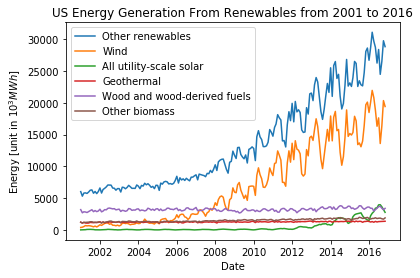

In [4]:
denrgt.showEnergyGen()